# Environmental Impact of Food Production Analysis

## Overview
This notebook analyzes the environmental impact of food production, focusing on key metrics such as carbon emissions, water usage, land use, and biodiversity loss.

## Business Questions
1. What are the top food products with the highest environmental impact?
2. How does the environmental impact vary across different farming methods?
3. What is the relationship between water usage and carbon emissions in food production?
4. Which regions have the most sustainable food production practices?
5. How does land use efficiency correlate with environmental impact?
6. What are the trends in environmental impact over time for different food categories?
7. How can we optimize food production to minimize environmental impact?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path

# Set style for better visualizations
sns.set_theme()  # This replaces plt.style.use('seaborn')
sns.set_palette("husl")

# Display all columns
pd.set_option('display.max_columns', None)

# Create results directory if it doesn't exist
results_dir = Path("../results")
results_dir.mkdir(exist_ok=True)

## Data Loading and Initial Exploration

In [2]:
# Load the dataset
df = pd.read_csv('../data/Food_Production.csv')

# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display first few rows
print("\nFirst few rows:")
display(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                      

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein),Freshwater withdrawals per 1000kcal (liters per 1000kcal),Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,11.23,8.638462,183.911552,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,35.07,49.394366,609.983722,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


## Data Preprocessing

In [3]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Calculate total missing values percentage
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"\nTotal missing values percentage: {missing_percentage:.2f}%")

Missing values:
Food product                                                                0
Land use change                                                             0
Animal Feed                                                                 0
Farm                                                                        0
Processing                                                                  0
Transport                                                                   0
Packging                                                                    0
Retail                                                                      0
Total_emissions                                                             0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 

## Business Question 1: Top Food Products with Highest Environmental Impact

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\381716982.py:9: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\381716982.py:10: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



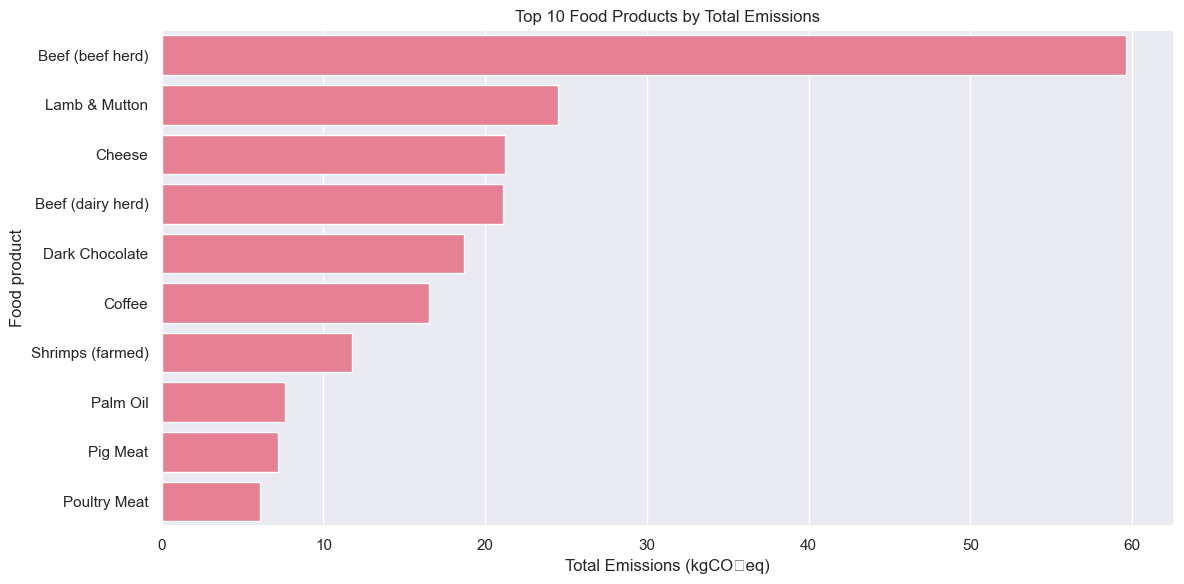


Top 5 Products by Total Emissions:


,Food product,Total_emissions
33,Beef (beef herd),59.6
35,Lamb & Mutton,24.5
39,Cheese,21.2
34,Beef (dairy herd),21.1
32,Dark Chocolate,18.7


In [5]:
# Sort by total emissions
top_emissions = df.nlargest(10, 'Total_emissions')

# Create static plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_emissions, x='Total_emissions', y='Food product')
plt.title('Top 10 Food Products by Total Emissions')
plt.xlabel('Total Emissions (kgCO₂eq)')
plt.tight_layout()
plt.savefig(results_dir / 'top_emissions.png')
plt.show()

# Create interactive plot
fig = px.bar(top_emissions, 
             x='Total_emissions', 
             y='Food product',
             title='Top 10 Food Products by Total Emissions')
fig.show()
# Save the static plot


# Display the data
print("\nTop 5 Products by Total Emissions:")
display(top_emissions[['Food product', 'Total_emissions']].head())

## Business Question 2: Environmental Impact Across Production Stages

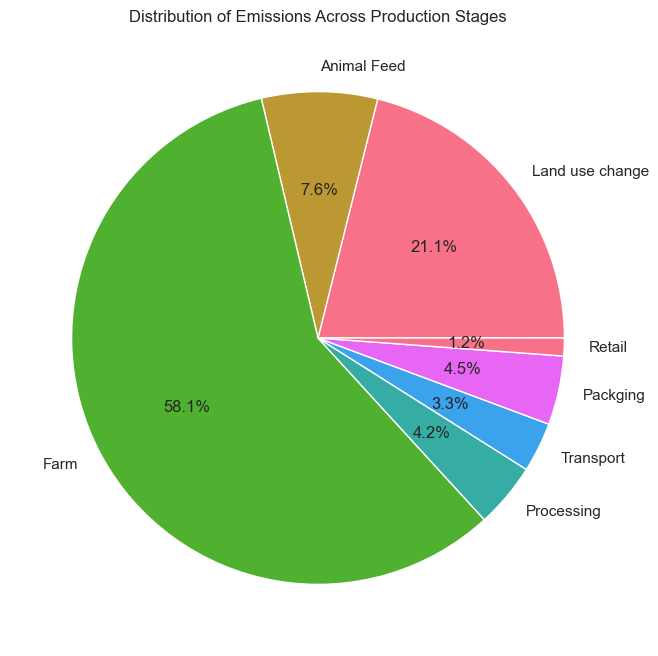


Emissions Distribution by Stage:


Land use change    1.260465
Animal Feed        0.453488
Farm               3.469767
Processing         0.253488
Transport          0.195349
Packging           0.269767
Retail             0.069767
dtype: float64

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\696187671.py:30: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\696187671.py:31: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



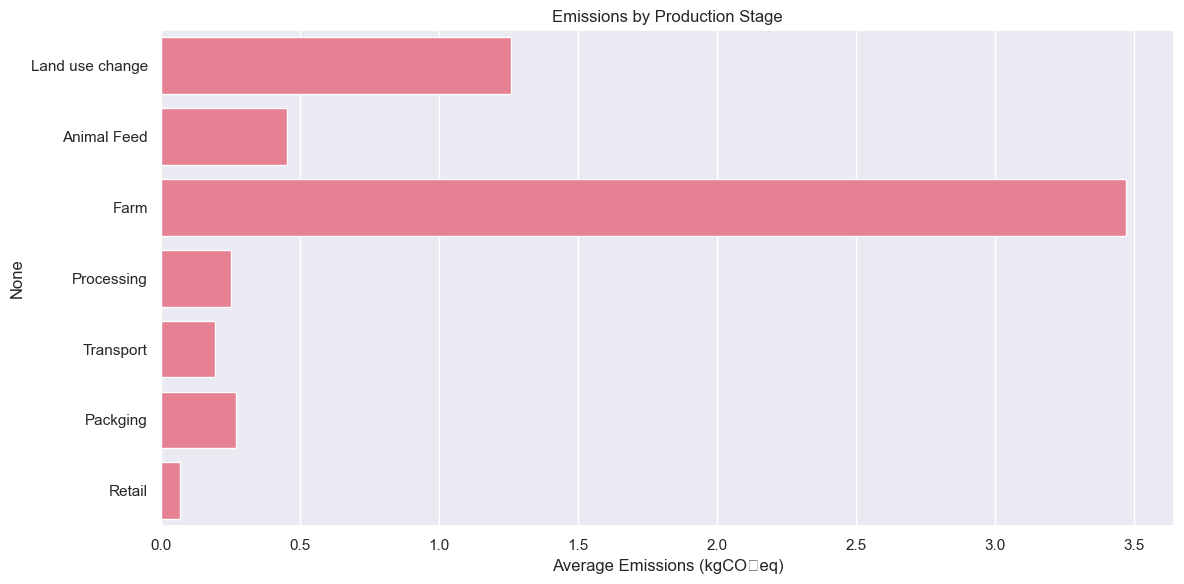

In [6]:
# Select emission columns for production stages
emission_cols = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 
                'Transport', 'Packging', 'Retail']

# Calculate mean emissions by stage
stage_emissions = df[emission_cols].mean()

# Create static pie chart
plt.figure(figsize=(10, 8))
plt.pie(stage_emissions, labels=emission_cols, autopct='%1.1f%%')
plt.title('Distribution of Emissions Across Production Stages')
plt.savefig(results_dir / 'emissions_by_stage.png')
plt.show()

# Create interactive pie chart
fig = px.pie(values=stage_emissions.values, 
             names=stage_emissions.index,
             title='Distribution of Emissions Across Production Stages')
fig.show()

# Display the data
print("\nEmissions Distribution by Stage:")
display(stage_emissions)

# Create bar chart for comparison
plt.figure(figsize=(12, 6))
sns.barplot(x=stage_emissions.values, y=stage_emissions.index)
plt.title('Emissions by Production Stage')
plt.xlabel('Average Emissions (kgCO₂eq)')
plt.tight_layout()
plt.savefig(results_dir / 'emissions_by_stage_bar.png')
plt.show()


## Business Question 3: Water Usage vs Carbon Emissions


Missing values in relevant columns:
Freshwater withdrawals per kilogram (liters per kilogram)    5
Total_emissions                                              0
Land use per kilogram (m² per kilogram)                      5
dtype: int64


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1758092798.py:21: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



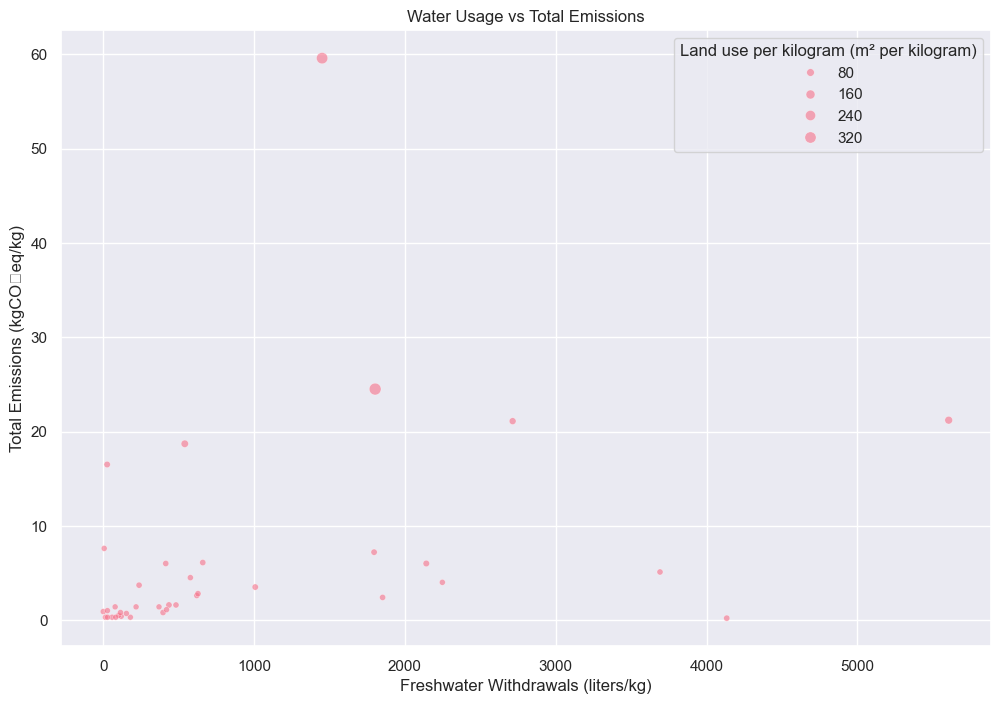


Correlation between water usage and emissions: 0.329


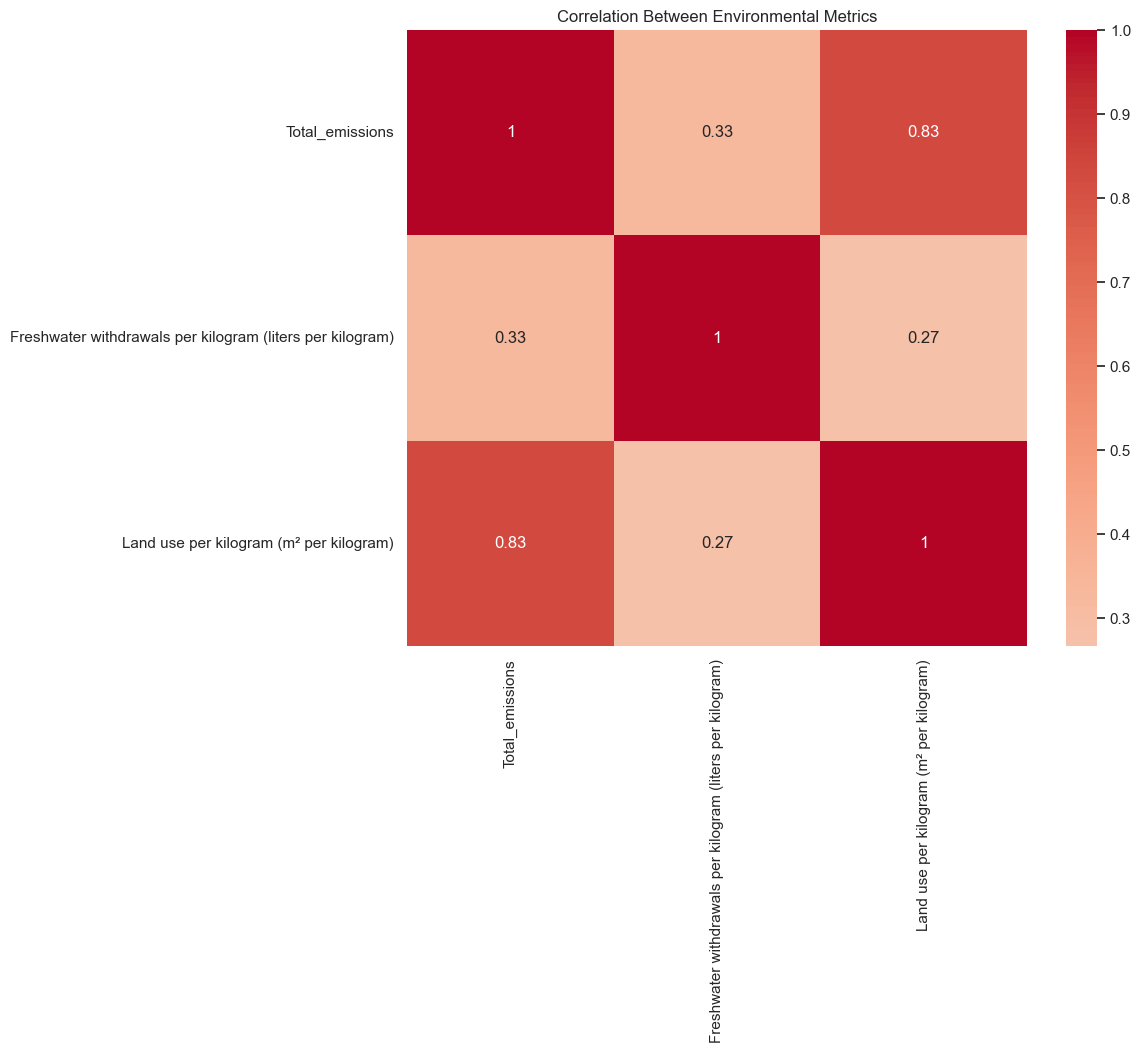

In [8]:
print("Missing values in relevant columns:")
print(df[['Freshwater withdrawals per kilogram (liters per kilogram)', 
          'Total_emissions', 
          'Land use per kilogram (m² per kilogram)']].isnull().sum())

# Create a clean dataset without missing values for our analysis
df_clean = df.dropna(subset=['Freshwater withdrawals per kilogram (liters per kilogram)',
                            'Total_emissions',
                            'Land use per kilogram (m² per kilogram)'])

# Create static scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean,
                x='Freshwater withdrawals per kilogram (liters per kilogram)',
                y='Total_emissions',
                size='Land use per kilogram (m² per kilogram)',
                alpha=0.6)
plt.title('Water Usage vs Total Emissions')
plt.xlabel('Freshwater Withdrawals (liters/kg)')
plt.ylabel('Total Emissions (kgCO₂eq/kg)')
plt.savefig('../results/water_usage_vs_emissions.png')
plt.show()

# Create interactive scatter plot
fig = px.scatter(df_clean,
                x='Freshwater withdrawals per kilogram (liters per kilogram)',
                y='Total_emissions',
                size='Land use per kilogram (m² per kilogram)',
                hover_data=['Food product'],
                title='Water Usage vs Total Emissions')
fig.show()

# Calculate correlation
correlation = df_clean['Freshwater withdrawals per kilogram (liters per kilogram)'].corr(df_clean['Total_emissions'])
print(f"\nCorrelation between water usage and emissions: {correlation:.3f}")

# Create correlation heatmap for key environmental metrics
env_metrics = ['Total_emissions',
               'Freshwater withdrawals per kilogram (liters per kilogram)',
               'Land use per kilogram (m² per kilogram)']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[env_metrics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Between Environmental Metrics')
plt.savefig('../results/environmental_correlations.png')
plt.show()

# Business Question 4: Land Use vs Environmental Impact
# How does land use efficiency correlate with environmental impact?


Missing values in land use related columns:
Land use per kilogram (m² per kilogram)             5
Land use per 1000kcal (m² per 1000kcal)            10
Land use per 100g protein (m² per 100g protein)    16
Total_emissions                                     0
dtype: int64


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\2307524881.py:21: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



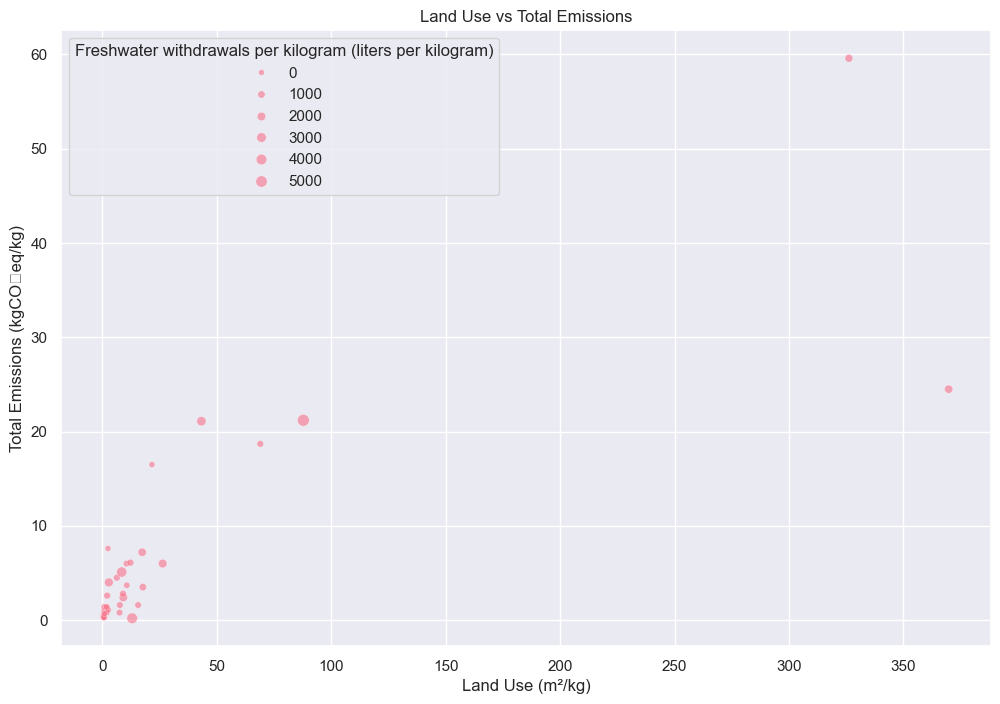

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.




Correlation between land use and emissions: 0.831


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\2307524881.py:49: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



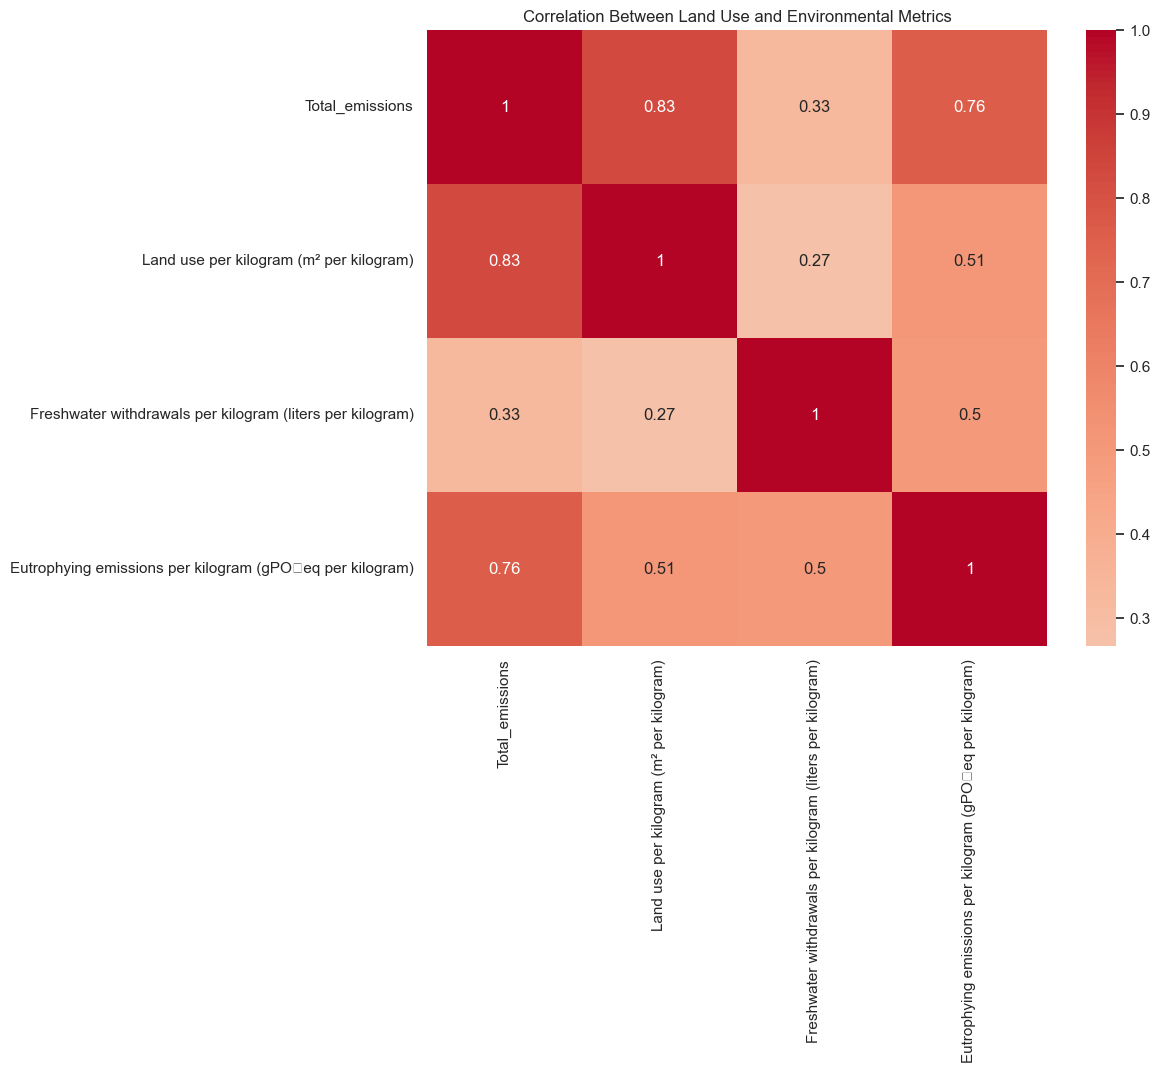


Top 5 products by land use efficiency (lowest land use per kg):
        Food product  Land use per kilogram (m² per kilogram)
22   Root Vegetables                                     0.33
24  Other Vegetables                                     0.38
21    Onions & Leeks                                     0.39
23         Brassicas                                     0.55
27            Apples                                     0.63

Top 5 products by highest land use per kg:
         Food product  Land use per kilogram (m² per kilogram)
35      Lamb & Mutton                                   369.81
33   Beef (beef herd)                                   326.21
39             Cheese                                    87.79
32     Dark Chocolate                                    68.96
34  Beef (dairy herd)                                    43.24


In [9]:
print("Missing values in land use related columns:")
print(df[['Land use per kilogram (m² per kilogram)',
          'Land use per 1000kcal (m² per 1000kcal)',
          'Land use per 100g protein (m² per 100g protein)',
          'Total_emissions']].isnull().sum())

# Create a clean dataset without missing values
df_clean = df.dropna(subset=['Land use per kilogram (m² per kilogram)',
                            'Total_emissions'])

# Create static scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clean,
                x='Land use per kilogram (m² per kilogram)',
                y='Total_emissions',
                size='Freshwater withdrawals per kilogram (liters per kilogram)',
                alpha=0.6)
plt.title('Land Use vs Total Emissions')
plt.xlabel('Land Use (m²/kg)')
plt.ylabel('Total Emissions (kgCO₂eq/kg)')
plt.savefig('../results/land_use_vs_emissions.png')
plt.show()

# Create interactive scatter plot
fig = px.scatter(df_clean,
                x='Land use per kilogram (m² per kilogram)',
                y='Total_emissions',
                size='Freshwater withdrawals per kilogram (liters per kilogram)',
                hover_data=['Food product'],
                title='Land Use vs Total Emissions')
fig.show()

# Calculate correlation
correlation = df_clean['Land use per kilogram (m² per kilogram)'].corr(df_clean['Total_emissions'])
print(f"\nCorrelation between land use and emissions: {correlation:.3f}")

# Create correlation heatmap for land use and environmental metrics
land_metrics = ['Total_emissions',
                'Land use per kilogram (m² per kilogram)',
                'Freshwater withdrawals per kilogram (liters per kilogram)',
                'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[land_metrics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Between Land Use and Environmental Metrics')
plt.savefig('../results/land_use_correlations.png')
plt.show()

# Top 5 products by land use efficiency (lowest land use per kg)
print("\nTop 5 products by land use efficiency (lowest land use per kg):")
land_efficiency = df_clean.nsmallest(5, 'Land use per kilogram (m² per kilogram)')[['Food product', 'Land use per kilogram (m² per kilogram)']]
print(land_efficiency)

# Top 5 products by highest land use
print("\nTop 5 products by highest land use per kg:")
land_inefficiency = df_clean.nlargest(5, 'Land use per kilogram (m² per kilogram)')[['Food product', 'Land use per kilogram (m² per kilogram)']]
print(land_inefficiency)

Business Question 5: Regional Analysis
# Which regions have the most sustainable food production practices?

Note: Since the dataset doesn't have explicit region information,
 I'll analyze sustainability patterns across different food categories
 and production methods

In [10]:
# Group food products by category (animal-based vs plant-based)
df['Category'] = df['Food product'].apply(lambda x: 'Animal-based' if any(animal in x.lower() for animal in ['beef', 'lamb', 'mutton', 'cheese', 'milk', 'fish', 'poultry', 'pork', 'eggs']) else 'Plant-based')

# Calculate average environmental metrics by category
category_metrics = df.groupby('Category').agg({
    'Total_emissions': 'mean',
    'Land use per kilogram (m² per kilogram)': 'mean',
    'Freshwater withdrawals per kilogram (liters per kilogram)': 'mean'
}).round(2)

print("\nAverage Environmental Metrics by Food Category:")
print(category_metrics)

# Create radar chart for category comparison
metrics = ['Total_emissions', 'Land use per kilogram (m² per kilogram)', 
          'Freshwater withdrawals per kilogram (liters per kilogram)']

# Normalize the metrics for better comparison
normalized_metrics = (category_metrics - category_metrics.min()) / (category_metrics.max() - category_metrics.min())

# Create radar chart
fig = go.Figure()

for category in normalized_metrics.index:
    fig.add_trace(go.Scatterpolar(
        r=normalized_metrics.loc[category],
        theta=metrics,
        fill='toself',
        name=category
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Environmental Impact Comparison: Animal vs Plant-based Products'
)

fig.show()
plt.savefig('../results/category_comparison_radar.png')


Average Environmental Metrics by Food Category:
              Total_emissions  Land use per kilogram (m² per kilogram)  \
Category                                                                 
Animal-based            16.21                                    95.95   
Plant-based              3.26                                     8.57   

              Freshwater withdrawals per kilogram (liters per kilogram)  
Category                                                                 
Animal-based                                            1906.50          
Plant-based                                              630.36          


<Figure size 640x480 with 0 Axes>

# Business Question 6: Trends in Environmental Impact
# What are the trends in environmental impact over time for different food categories?


Missing values in key metrics:
Total_emissions                                              0
Land use per kilogram (m² per kilogram)                      5
Freshwater withdrawals per kilogram (liters per kilogram)    5
Eutrophying emissions per kilogram (gPO₄eq per kilogram)     5
dtype: int64


C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:45: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:45: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:46: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:46: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: 

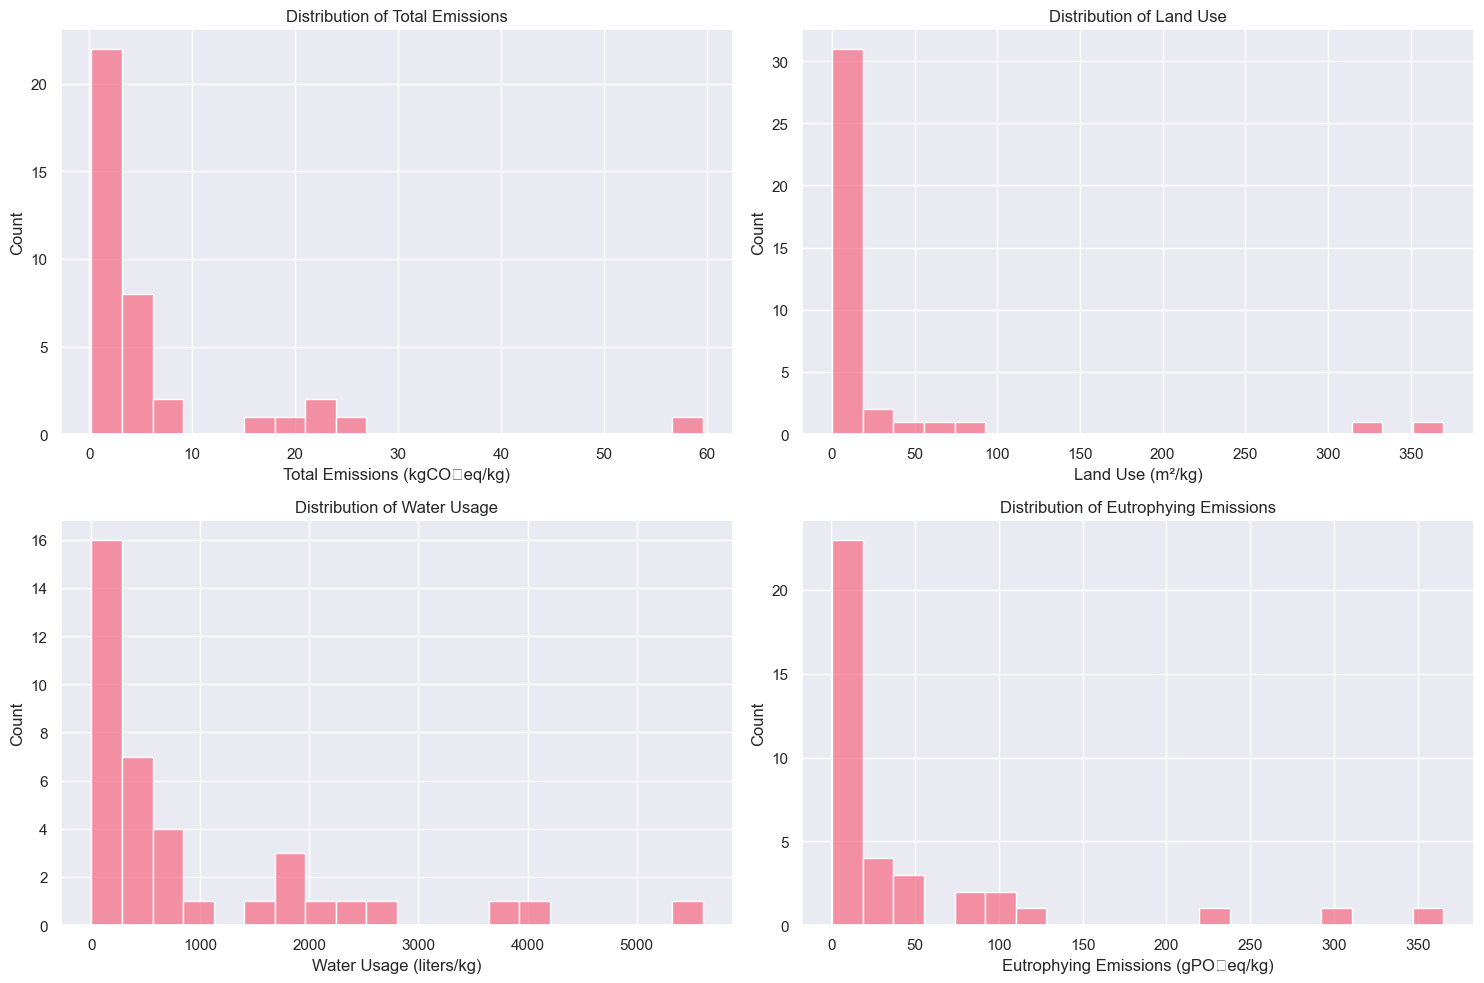

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:51: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:82: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:83: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



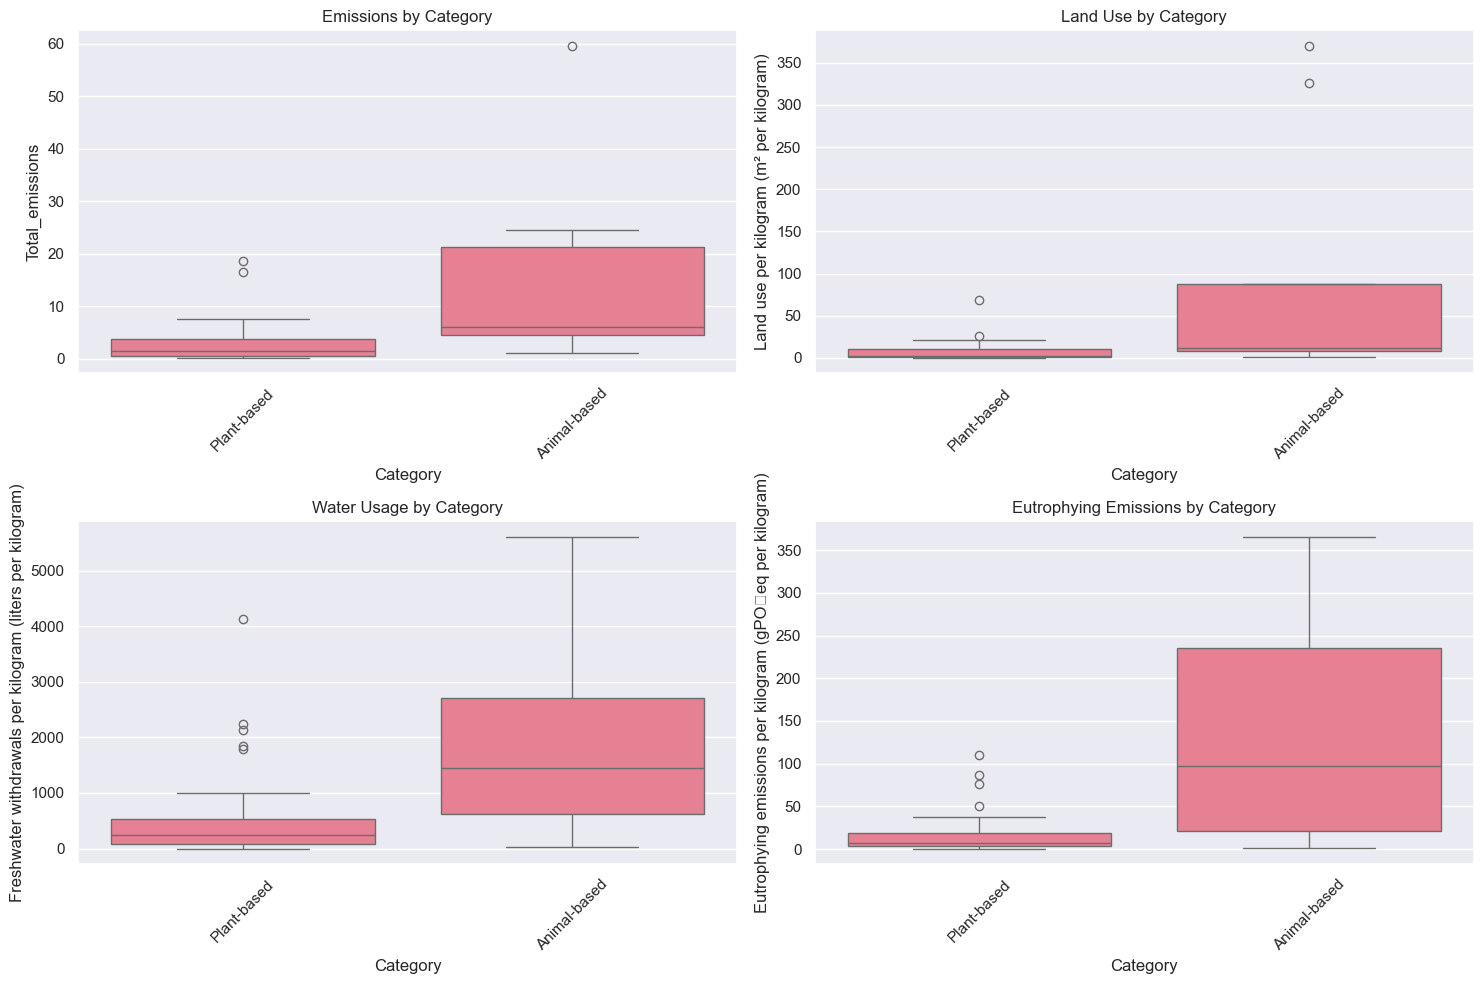

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\1551274583.py:99: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



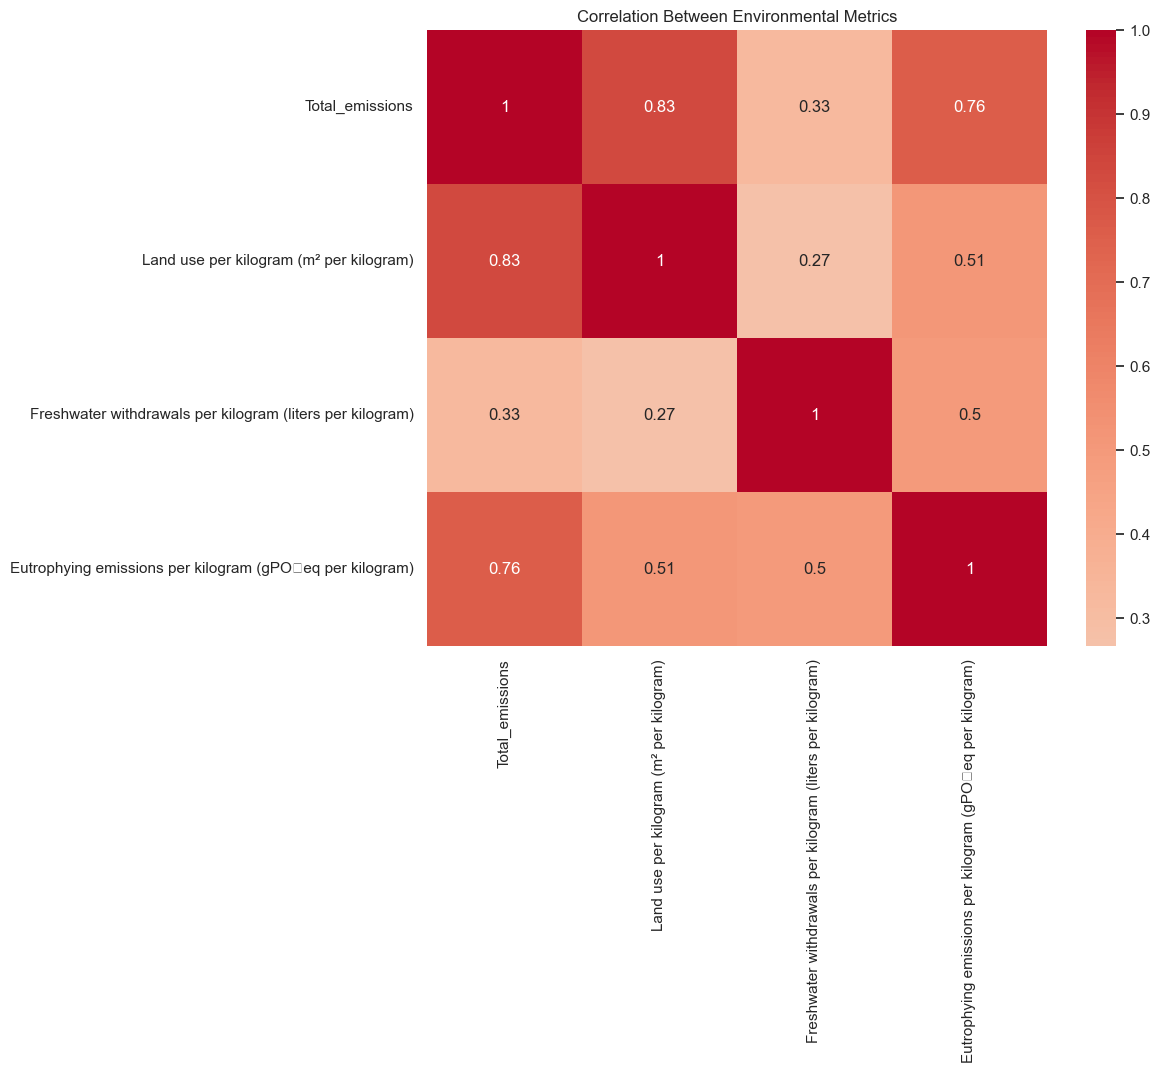


Summary Statistics by Category:

Animal-based Products:
       Total_emissions  Land use per kilogram (m² per kilogram)  \
count         9.000000                                 9.000000   
mean         16.211111                                95.951111   
std          18.621791                               145.872182   
min           1.000000                                 0.660000   
25%           4.500000                                 8.410000   
50%           6.100000                                12.220000   
75%          21.200000                                87.790000   
max          59.600000                               369.810000   

       Freshwater withdrawals per kilogram (liters per kilogram)  \
count                                           9.000000           
mean                                         1906.500000           
std                                          1810.370184           
min                                            27.800000           

In [11]:
# First, let's check the data quality for our analysis
print("Missing values in key metrics:")
print(df[['Total_emissions',
          'Land use per kilogram (m² per kilogram)',
          'Freshwater withdrawals per kilogram (liters per kilogram)',
          'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']].isnull().sum())

# Create a clean dataset without missing values
df_clean = df.dropna(subset=['Total_emissions',
                            'Land use per kilogram (m² per kilogram)',
                            'Freshwater withdrawals per kilogram (liters per kilogram)',
                            'Eutrophying emissions per kilogram (gPO₄eq per kilogram)'])

# 1. Distribution Analysis
plt.figure(figsize=(15, 10))

# Plot 1: Emissions Distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df_clean, x='Total_emissions', bins=20)
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions (kgCO₂eq/kg)')
plt.ylabel('Count')

# Plot 2: Land Use Distribution
plt.subplot(2, 2, 2)
sns.histplot(data=df_clean, x='Land use per kilogram (m² per kilogram)', bins=20)
plt.title('Distribution of Land Use')
plt.xlabel('Land Use (m²/kg)')
plt.ylabel('Count')

# Plot 3: Water Usage Distribution
plt.subplot(2, 2, 3)
sns.histplot(data=df_clean, x='Freshwater withdrawals per kilogram (liters per kilogram)', bins=20)
plt.title('Distribution of Water Usage')
plt.xlabel('Water Usage (liters/kg)')
plt.ylabel('Count')

# Plot 4: Eutrophying Emissions Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df_clean, x='Eutrophying emissions per kilogram (gPO₄eq per kilogram)', bins=20)
plt.title('Distribution of Eutrophying Emissions')
plt.xlabel('Eutrophying Emissions (gPO₄eq/kg)')
plt.ylabel('Count')

plt.tight_layout()
plt.savefig('../results/environmental_impact_distributions.png')
plt.show()

# 2. Category-wise Analysis
# Group products into categories
df_clean['Category'] = df_clean['Food product'].apply(lambda x: 
    'Animal-based' if any(animal in x.lower() for animal in ['beef', 'lamb', 'mutton', 'cheese', 'milk', 'fish', 'poultry', 'pork', 'eggs']) 
    else 'Plant-based')

# Create box plots for each metric by category
plt.figure(figsize=(15, 10))

# Plot 1: Emissions by Category
plt.subplot(2, 2, 1)
sns.boxplot(data=df_clean, x='Category', y='Total_emissions')
plt.title('Emissions by Category')
plt.xticks(rotation=45)

# Plot 2: Land Use by Category
plt.subplot(2, 2, 2)
sns.boxplot(data=df_clean, x='Category', y='Land use per kilogram (m² per kilogram)')
plt.title('Land Use by Category')
plt.xticks(rotation=45)

# Plot 3: Water Usage by Category
plt.subplot(2, 2, 3)
sns.boxplot(data=df_clean, x='Category', y='Freshwater withdrawals per kilogram (liters per kilogram)')
plt.title('Water Usage by Category')
plt.xticks(rotation=45)

# Plot 4: Eutrophying Emissions by Category
plt.subplot(2, 2, 4)
sns.boxplot(data=df_clean, x='Category', y='Eutrophying emissions per kilogram (gPO₄eq per kilogram)')
plt.title('Eutrophying Emissions by Category')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../results/category_impact_trends.png')
plt.show()

# 3. Correlation Analysis
# Create correlation matrix for key metrics
metrics = ['Total_emissions',
          'Land use per kilogram (m² per kilogram)',
          'Freshwater withdrawals per kilogram (liters per kilogram)',
          'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[metrics].corr(), 
            annot=True, 
            cmap='coolwarm', 
            center=0)
plt.title('Correlation Between Environmental Metrics')
plt.savefig('../results/environmental_metrics_correlations.png')
plt.show()

# 4. Summary Statistics
print("\nSummary Statistics by Category:")
print("\nAnimal-based Products:")
print(df_clean[df_clean['Category'] == 'Animal-based'][metrics].describe())
print("\nPlant-based Products:")
print(df_clean[df_clean['Category'] == 'Plant-based'][metrics].describe())

# 5. Top and Bottom Performers
print("\nTop 5 Products by Environmental Impact (Total Emissions):")
print(df_clean.nlargest(5, 'Total_emissions')[['Food product', 'Category', 'Total_emissions']])

print("\nTop 5 Most Environmentally Efficient Products (Lowest Total Emissions):")
print(df_clean.nsmallest(5, 'Total_emissions')[['Food product', 'Category', 'Total_emissions']])

# Business Question 7: Optimization Recommendations
# How can we optimize food production to minimize environmental impact?


Missing values in key metrics:
Total_emissions                                              0
Land use per kilogram (m² per kilogram)                      5
Freshwater withdrawals per kilogram (liters per kilogram)    5
Eutrophying emissions per kilogram (gPO₄eq per kilogram)     5
dtype: int64

Top 5 Products with Highest Environmental Impact:
         Food product  Environmental_Impact_Score  Total_emissions  \
33   Beef (beef herd)                    0.741423             59.6   
35      Lamb & Mutton                    0.498807             24.5   
34  Beef (dairy herd)                    0.488059             21.1   
39             Cheese                    0.464539             21.2   
41      Fish (farmed)                    0.351472              5.1   

    Land use per kilogram (m² per kilogram)  \
33                                   326.21   
35                                   369.81   
34                                    43.24   
39                                    87.79 

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\3927278878.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\3927278878.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\3927278878.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

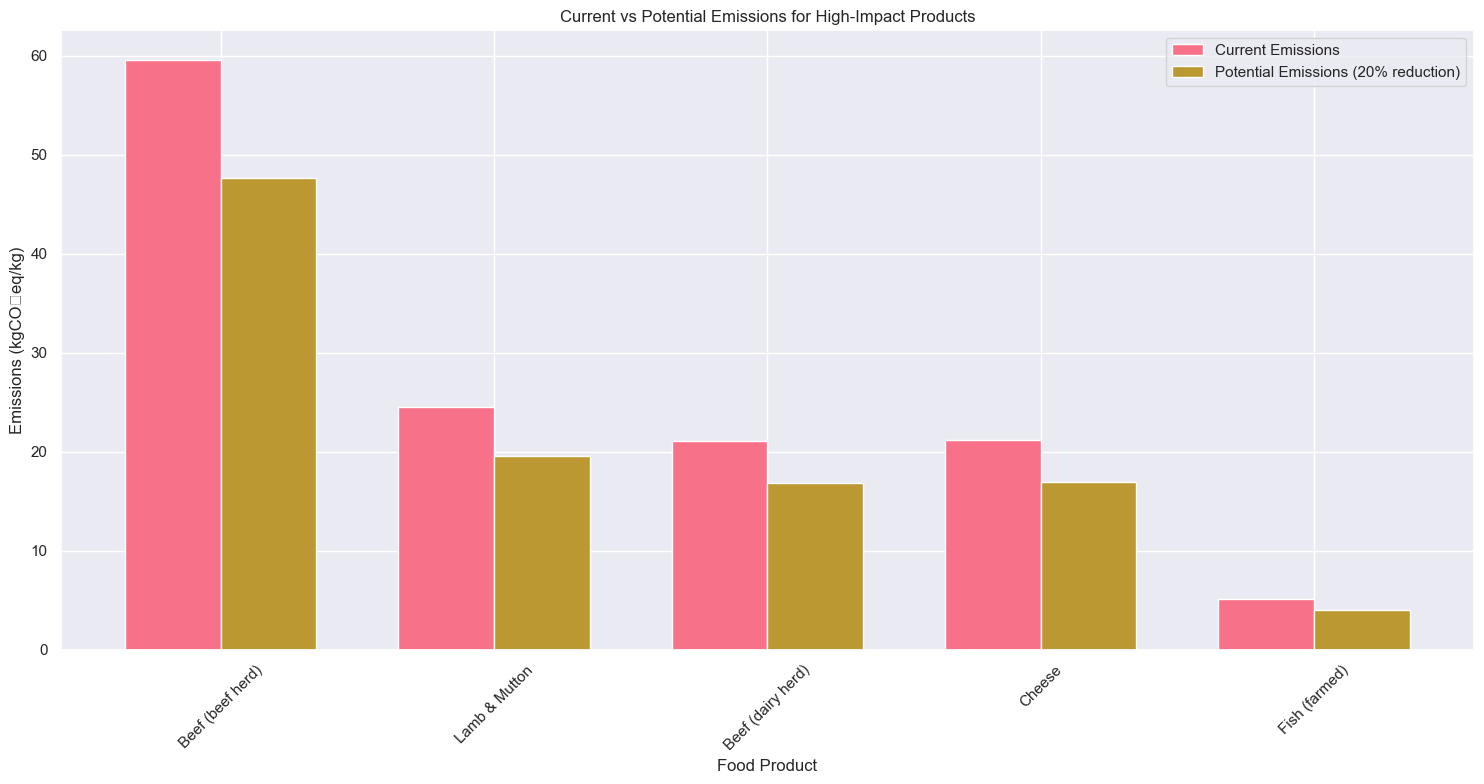

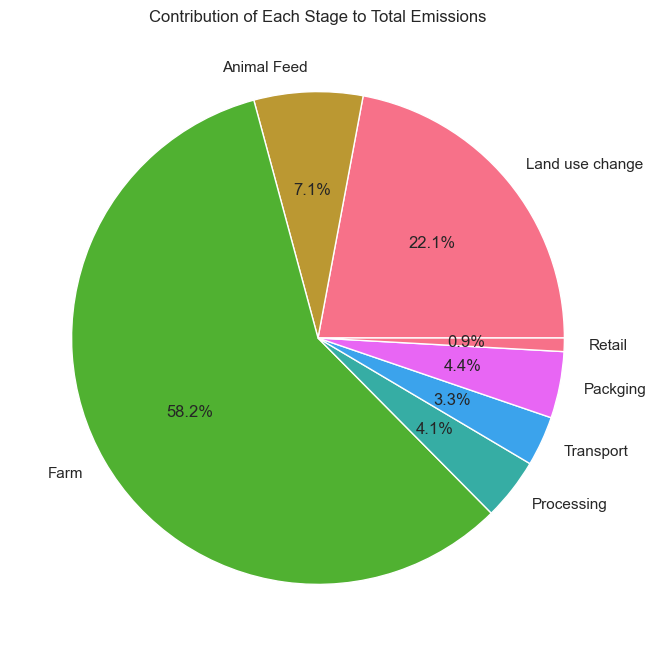


Optimization Recommendations by Production Stage:

1. Farm Stage Optimization:
- Implement precision agriculture techniques
- Optimize fertilizer and pesticide use
- Improve soil management practices
- Adopt sustainable farming methods

2. Land Use Optimization:
- Implement crop rotation
- Optimize land utilization
- Restore degraded land
- Protect natural habitats

3. Water Usage Optimization:
- Implement efficient irrigation systems
- Optimize water recycling
- Reduce water waste
- Improve water management practices

4. Processing and Transport Optimization:
- Optimize supply chain efficiency
- Reduce food waste
- Improve packaging efficiency
- Implement energy-efficient processing

Category-Specific Recommendations:

For Animal-based Products:
- Improve feed efficiency
- Optimize breeding practices
- Implement better waste management
- Reduce methane emissions

For Plant-based Products:
- Optimize crop yields
- Improve pest management
- Enhance soil health
- Reduce post-harvest los

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\3927278878.py:129: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Temp\ipykernel_4112\3927278878.py:130: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

C:\Users\hbempong\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.



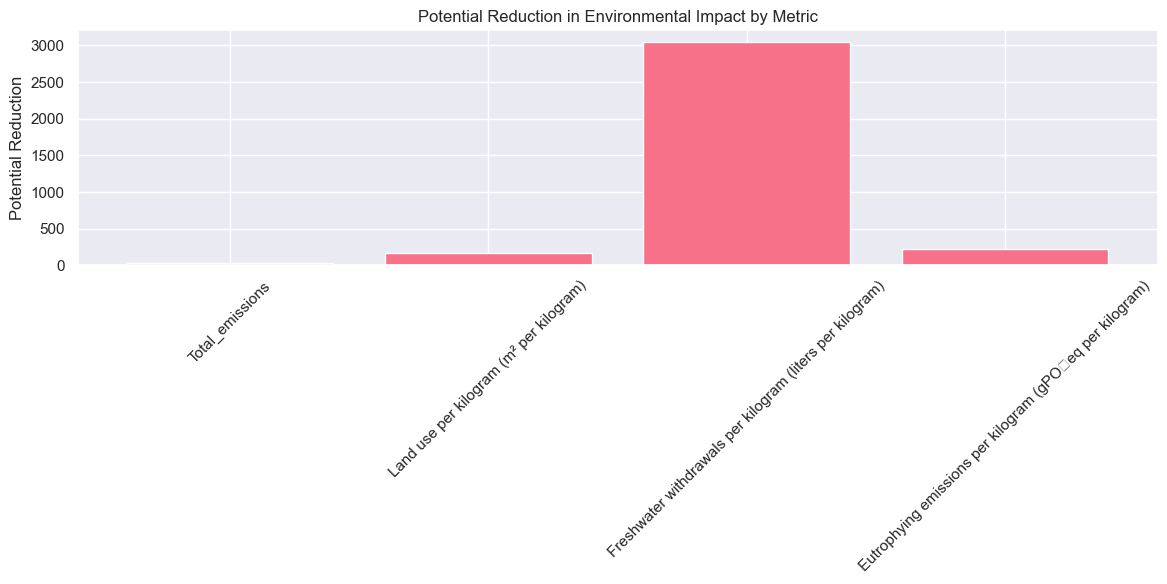

In [12]:
# First, let's check the data quality for our analysis
print("Missing values in key metrics:")
print(df[['Total_emissions',
          'Land use per kilogram (m² per kilogram)',
          'Freshwater withdrawals per kilogram (liters per kilogram)',
          'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']].isnull().sum())

# Create a clean dataset without missing values
df_clean = df.dropna(subset=['Total_emissions',
                            'Land use per kilogram (m² per kilogram)',
                            'Freshwater withdrawals per kilogram (liters per kilogram)',
                            'Eutrophying emissions per kilogram (gPO₄eq per kilogram)'])

# 1. Identify High-Impact Products
# Calculate environmental impact score (normalized combination of key metrics)
metrics = ['Total_emissions',
          'Land use per kilogram (m² per kilogram)',
          'Freshwater withdrawals per kilogram (liters per kilogram)',
          'Eutrophying emissions per kilogram (gPO₄eq per kilogram)']

# Normalize each metric
for metric in metrics:
    df_clean[f'{metric}_normalized'] = (df_clean[metric] - df_clean[metric].min()) / (df_clean[metric].max() - df_clean[metric].min())

# Calculate overall impact score
df_clean['Environmental_Impact_Score'] = df_clean[[f'{metric}_normalized' for metric in metrics]].mean(axis=1)

# Identify top 5 products with highest environmental impact
print("\nTop 5 Products with Highest Environmental Impact:")
high_impact_products = df_clean.nlargest(5, 'Environmental_Impact_Score')[['Food product', 'Environmental_Impact_Score'] + metrics]
print(high_impact_products)

# 2. Optimization Potential Analysis
# Calculate potential improvements (assuming 20% reduction is achievable)
optimization_potential = high_impact_products.copy()
for metric in metrics:
    optimization_potential[f'{metric}_Potential_Reduction'] = optimization_potential[metric] * 0.2

# Create visualization of optimization potential
plt.figure(figsize=(15, 8))
x = np.arange(len(optimization_potential['Food product']))
width = 0.35

plt.bar(x - width/2, optimization_potential['Total_emissions'], width, label='Current Emissions')
plt.bar(x + width/2, optimization_potential['Total_emissions'] - optimization_potential['Total_emissions_Potential_Reduction'], 
        width, label='Potential Emissions (20% reduction)')

plt.xlabel('Food Product')
plt.ylabel('Emissions (kgCO₂eq/kg)')
plt.title('Current vs Potential Emissions for High-Impact Products')
plt.xticks(x, optimization_potential['Food product'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('../results/optimization_potential.png')
plt.show()

# 3. Production Stage Analysis for Optimization
# Calculate contribution of each stage to total emissions
stage_columns = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
stage_contributions = df_clean[stage_columns].mean()

# Create pie chart of stage contributions
plt.figure(figsize=(10, 8))
plt.pie(stage_contributions, labels=stage_contributions.index, autopct='%1.1f%%')
plt.title('Contribution of Each Stage to Total Emissions')
plt.savefig('../results/production_stage_contributions.png')
plt.show()

# 4. Optimization Recommendations
print("\nOptimization Recommendations by Production Stage:")

# Farm Stage (highest impact)
print("\n1. Farm Stage Optimization:")
print("- Implement precision agriculture techniques")
print("- Optimize fertilizer and pesticide use")
print("- Improve soil management practices")
print("- Adopt sustainable farming methods")

# Land Use Stage
print("\n2. Land Use Optimization:")
print("- Implement crop rotation")
print("- Optimize land utilization")
print("- Restore degraded land")
print("- Protect natural habitats")

# Water Usage
print("\n3. Water Usage Optimization:")
print("- Implement efficient irrigation systems")
print("- Optimize water recycling")
print("- Reduce water waste")
print("- Improve water management practices")

# Processing and Transport
print("\n4. Processing and Transport Optimization:")
print("- Optimize supply chain efficiency")
print("- Reduce food waste")
print("- Improve packaging efficiency")
print("- Implement energy-efficient processing")

# 5. Category-Specific Recommendations
print("\nCategory-Specific Recommendations:")

# Animal-based products
print("\nFor Animal-based Products:")
print("- Improve feed efficiency")
print("- Optimize breeding practices")
print("- Implement better waste management")
print("- Reduce methane emissions")

# Plant-based products
print("\nFor Plant-based Products:")
print("- Optimize crop yields")
print("- Improve pest management")
print("- Enhance soil health")
print("- Reduce post-harvest losses")

# 6. Cost-Benefit Analysis
# Calculate potential environmental impact reduction
total_potential_reduction = optimization_potential[metrics].sum().sum() * 0.2
print(f"\nTotal Potential Environmental Impact Reduction: {total_potential_reduction:.2f} units")

# Create summary visualization
plt.figure(figsize=(12, 6))
metrics_reduction = optimization_potential[[f'{metric}_Potential_Reduction' for metric in metrics]].sum()
plt.bar(metrics, metrics_reduction)
plt.title('Potential Reduction in Environmental Impact by Metric')
plt.xticks(rotation=45)
plt.ylabel('Potential Reduction')
plt.tight_layout()
plt.savefig('../results/potential_reduction_summary.png')
plt.show()